In [1]:
# download file
%mkdir -p utils
!wget -P utils https://raw.githubusercontent.com/alibaniasad1999/tse/refs/heads/main/Learning/utils/utils.py

--2025-03-07 22:45:46--  https://raw.githubusercontent.com/alibaniasad1999/tse/refs/heads/main/Learning/utils/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 198.18.0.59
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|198.18.0.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2743 (2.7K) [text/plain]
Saving to: ‘utils/utils.py.1’

utils.py.1          100%[===================>]   2.68K  --.-KB/s    in 0s      

2025-03-07 22:45:46 (20.9 MB/s) - ‘utils/utils.py.1’ saved [2743/2743]



In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import tensorflow as tf
from utils.utils import CreateTSEDataset
import matplotlib.pyplot as plt
import importlib
import utils.utils  # Ensure the module is imported first
import glob
import os

2025-03-07 23:34:24.016763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
def read_data(path=None):
    if path is None:
        path = "tickers_data/"
    if os.path.isdir(path):
        path = path
    else:
        from google.colab import drive
        drive.mount('/content/drive')
        path = "/content/drive/My Drive/tse"+path
    files = glob.glob(path + "*.csv")
    print(files)
    data = {}
    for file in files:
        data[file.split("/")[-1].split(".")[0]] = pd.read_csv(file)
    return data 

In [37]:
# symbol = "فملی"
# tse_data = get_data(symbols=symbol, write_to_csv=True, adjust=False)  # Get the data for فملی
# df = pd.read_csv("tickers_data/فملی.csv")
tse_data = read_data("tickers_data/")

['tickers_data/تفارس-ت.csv', 'tickers_data/گنگین-ت.csv', 'tickers_data/واتیح-ت.csv', 'tickers_data/خفولا-ت.csv', 'tickers_data/حریل-ت.csv', 'tickers_data/ونچر-ت.csv', 'tickers_data/خودرو-ت.csv', 'tickers_data/نطرین-ت.csv', 'tickers_data/زماهان-ت.csv', 'tickers_data/شکربن-ت.csv', 'tickers_data/وتوکا-ت.csv', 'tickers_data/نبروجح-ت.csv', 'tickers_data/بترانسح-ت.csv', 'tickers_data/فولاژح-ت.csv', 'tickers_data/وغدیر-ت.csv', 'tickers_data/پلاست-ت.csv', 'tickers_data/سکردح-ت.csv', 'tickers_data/غپینو-ت.csv', 'tickers_data/گنجین-ت.csv', 'tickers_data/لوتوسح-ت.csv', 'tickers_data/وساشرقی-ت.csv', 'tickers_data/سیلامح-ت.csv', 'tickers_data/وسرضوی-ت.csv', 'tickers_data/ولساپا-ت.csv', 'tickers_data/وحکمت-ت.csv', 'tickers_data/اتکام-ت.csv', 'tickers_data/کفپارس-ت.csv', 'tickers_data/ختور-ت.csv', 'tickers_data/سهرمز-ت.csv', 'tickers_data/سفانوح-ت.csv', 'tickers_data/کنیلوح-ت.csv', 'tickers_data/دتمادح-ت.csv', 'tickers_data/ولپارس-ت.csv', 'tickers_data/وتوسمح-ت.csv', 'tickers_data/کمنگنز-ت.csv', 'tic

In [38]:
print(tse_data)

{'تفارس-ت':            date    open    high     low  adjClose         value    volume   
0    2022-05-24  1305.0  1305.0  1305.0    1305.0  103316144000  32286295  \
1    2022-05-25  1344.0  1344.0  1344.0    1344.0  205888054656  62466036   
2    2022-05-28  1384.0  1384.0  1384.0    1384.0   57589096722  16967913   
3    2022-05-29  1426.0  1426.0  1426.0    1426.0   52381777335  14987633   
4    2022-05-30  1468.0  1468.0  1468.0    1468.0   30231621594   8400006   
..          ...     ...     ...     ...       ...           ...       ...   
591  2025-02-19  1690.0  1700.0  1689.0    1737.0    1505447707    887999   
592  2025-02-22  1686.0  1789.0  1685.0    1738.0    4951201663   2841679   
593  2025-02-23  1703.0  1790.0  1703.0    1749.0    4632268188   2595421   
594  2025-02-24  1717.0  1801.0  1701.0    1792.0   17590689140   9774204   
595  2025-02-25  1834.0  1845.0  1751.0    1796.0    2114466822   1156883   

     count  yesterday   close  
0     6481      408.0  1305.0  

In [39]:
for symbol in tse_data.keys():
    df = tse_data[symbol] 
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df = df.set_index(df['date'])
    df = df.drop(['date'], axis=1)
    tse_data[symbol] = df
    # break

In [40]:
tse_data[list(tse_data.keys())[0]].head()

,open,high,low,adjClose,value,volume,count,yesterday,close
date,,,,,,,,,
2022-05-24,1305.0,1305.0,1305.0,1305.0,103316144000,32286295,6481,408.0,1305.0
2022-05-25,1344.0,1344.0,1344.0,1344.0,205888054656,62466036,6962,1305.0,1344.0
2022-05-28,1384.0,1384.0,1384.0,1384.0,57589096722,16967913,2028,1344.0,1384.0
2022-05-29,1426.0,1426.0,1426.0,1426.0,52381777335,14987633,1824,1384.0,1426.0
2022-05-30,1468.0,1468.0,1468.0,1468.0,30231621594,8400006,1165,1426.0,1468.0


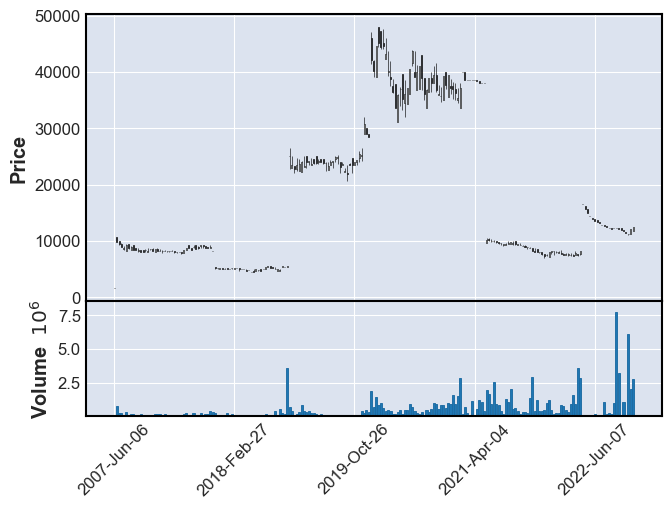

In [7]:
mpf.plot(df, type='candle', volume=True)

In [71]:
importlib.reload(utils.utils)  # Reload the module
from utils.utils import CreateTSEDataset
output_columns = ['open', 'high', 'low', 'close']
X_all, y_all = [], []
X_all_percentage, y_all_percentage = [], []
for i, symbol in enumerate(tse_data.keys()):
    df = tse_data[symbol]
    data_set = CreateTSEDataset(data=df, look_back=14, look_forward=3)
    data_set.handle_zeros(method='ffill')  # or 'bfill' for backward fill
    X, y = data_set.create_dataset(output_columns=output_columns)
    if len(X) == 0:
        continue

    X_all.append(X)
    y_all.append(y)
    temp = data_set.percentage_change(df.copy())
    data_set.data = temp
    X_percentage, y_percentage = data_set.create_dataset(output_columns=output_columns)
    # X_percentage = (X[:, 1:, :] - X[:, :-1, :]) / X[:, :-1, :] * 100
    # y_percentage = (y[:, 1:, :] - y[:, :-1, :]) / y[:, :-1, :] * 100

    X_all_percentage.append(X_percentage)
    y_all_percentage.append(y_percentage)
    print(f"{i}/{len(tse_data)}, {symbol}")
    if i > 10:
        break

0/1376, تفارس-ت
1/1376, گنگین-ت
2/1376, واتیح-ت
3/1376, خفولا-ت
4/1376, حریل-ت
5/1376, ونچر-ت
6/1376, خودرو-ت
7/1376, نطرین-ت
8/1376, زماهان-ت
9/1376, شکربن-ت
10/1376, وتوکا-ت
11/1376, نبروجح-ت


In [72]:
X_all

[array([[[1.6000e+03, 1.6000e+03, 1.6000e+03, ..., 1.0000e+00,
          1.6000e+03, 1.6000e+03],
         [1.0599e+04, 1.0599e+04, 9.7520e+03, ..., 4.3400e+02,
          1.6000e+03, 9.7600e+03],
         [1.0050e+04, 1.0050e+04, 9.3000e+03, ..., 2.1600e+02,
          9.9220e+03, 9.4500e+03],
         ...,
         [8.3500e+03, 8.3500e+03, 8.0010e+03, ..., 4.7000e+01,
          8.3640e+03, 8.0010e+03],
         [8.3000e+03, 8.4430e+03, 8.0000e+03, ..., 1.4000e+01,
          8.2200e+03, 8.0510e+03],
         [8.3500e+03, 8.4980e+03, 8.0700e+03, ..., 7.8000e+01,
          8.0520e+03, 8.3000e+03]],
 
        [[1.0599e+04, 1.0599e+04, 9.7520e+03, ..., 4.3400e+02,
          1.6000e+03, 9.7600e+03],
         [1.0050e+04, 1.0050e+04, 9.3000e+03, ..., 2.1600e+02,
          9.9220e+03, 9.4500e+03],
         [9.4500e+03, 9.6500e+03, 8.8890e+03, ..., 1.5000e+02,
          9.6480e+03, 8.9210e+03],
         ...,
         [8.3000e+03, 8.4430e+03, 8.0000e+03, ..., 1.4000e+01,
          8.2200e+03, 8.

In [73]:
X_all = np.vstack(X_all)  # Shape: (samples, 14, 2)
y_all = np.vstack(y_all)  # Shape: (samples, 14, 2)
X_all_percentage = np.vstack(X_all_percentage)
y_all_percentage = np.vstack(y_all_percentage)

In [61]:
X.shape

(201, 14, 9)

In [74]:
X_all.shape, y_all.shape, X_all_percentage.shape, y_all_percentage.shape

((2412, 14, 9), (2412, 3, 4), (2412, 14, 9), (2412, 3, 4))

In [18]:
# output_columns = ['open', 'high', 'low', 'close']
# X, y = data_set.create_dataset(output_columns=output_columns)
# X, y = data_set.create_dataset(output_columns=output_columns)
# X.shape, y.shape
# X_scale, y_scale = data_set.create_dataset_scaled(output_columns=output_columns)
# y_scale_inverse = data_set.inverse_scale_data(y_scale, output_columns)
# compare the original data with the scaled and inverse scaled data
# for i in range(4):
#     plt.plot(y[:, i], label='Original')
#     plt.plot(y_scale_inverse[output_columns[i]], label='Inverse')
#     plt.legend()
#     plt.show()
#     plt.plot(y_scale[:, i], label='Scaled')
#     plt.legend()
#     plt.show()
########## worked well ##########



In [75]:
X_all.shape, y_all.shape

((2412, 14, 9), (2412, 3, 4))

In [107]:
# validate data percentages and real data that fit together with plot
# make X data based on X percentage
X_new = []
for i in range(len(X[-1, :, 0])):
    if i == 0:
        X_new_ = X[-1, 0, 0]
    else:
        X_new_ = X[-1, i-1, 0] + X[-1, i, 0]*X_percentage[-1, i, 0]/100
    X_new.append(X_new_)

In [106]:
print(X[0, 0, 0])
print(X_percentage[0, 0, 0]) 
print(X[-1, 0, 0])
print(X[-1, -0, 0] + X[-1, 0, 0]*X_percentage[-1, 0, 0]/100)

1600.0
0.0
13800.0
13506.382978723404


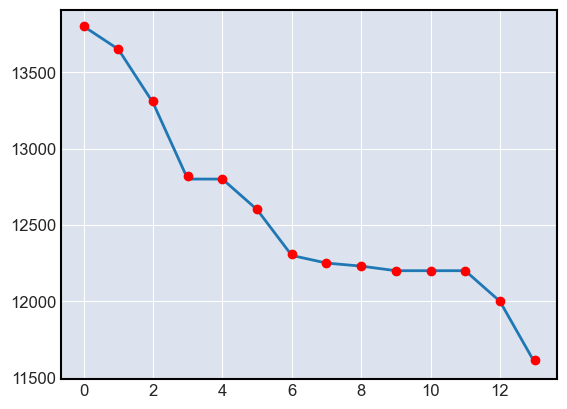

In [108]:
plt.plot(X[-1, :, 0])
plt.plot(X_new, 'ro')

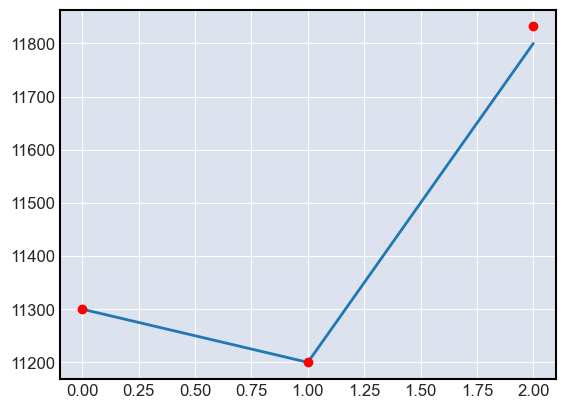

In [110]:
# validate data percentages and real data that fit together with plot
# make y data based on y percentage
y_new = []
for i in range(len(y[-1, :, 0])):
    if i == 0:
        y_new_ = y[-1, 0, 0] 
    else:
        y_new_ = y[-1, i-1, 0] + y[-1, i, 0]*y_percentage[-1, i, 0]/100
    y_new.append(y_new_)

plt.plot(y[-1, :, 0])
plt.plot(y_new, 'ro')


In [111]:
# separate the data to train and test
train_percent = 0.8
train_size = int(len(X_percentage) * train_percent)
X_train, X_test = X_percentage[:train_size], X_percentage[train_size:]
y_train, y_test = y_percentage[:train_size], y_percentage[train_size:]

In [112]:
# to tensor
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32) 
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [114]:
# lstm model
def lstm_model(x, y):
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(1024, return_sequences=True, input_shape=(x.shape[1], x.shape[2])),  # First LSTM layer
        tf.keras.layers.LSTM(1024, return_sequences=True),  # Second LSTM layer
        tf.keras.layers.LSTM(512),  # Third LSTM layer
        tf.keras.layers.RepeatVector(3),  # Repeat the output to 3 days (output 3 time steps)
        tf.keras.layers.LSTM(128, return_sequences=True),  # LSTM to process the output sequence
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4))  # Output layer (3 days * 4 kinds)
    ])
    
    return model
model = lstm_model(X_train, y_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 1028)          4268256   
                                                                 
 lstm_5 (LSTM)               (None, 14, 1028)          8458384   
                                                                 
 lstm_6 (LSTM)               (None, 512)               3155968   
                                                                 
 repeat_vector_1 (RepeatVec  (None, 3, 512)            0         
 tor)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 3, 128)            328192    
                                                                 
 time_distributed_1 (TimeDi  (None, 3, 4)              516       
 stributed)                                           

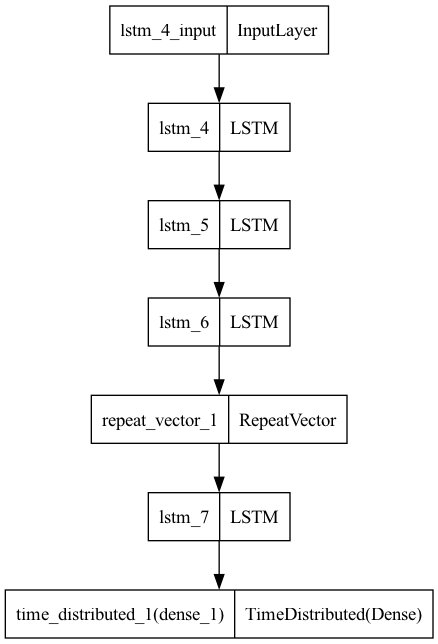

In [115]:
tf.keras.utils.plot_model(model)

In [116]:
# device if gpu is available
device = '/gpu:0' if tf.test.is_gpu_available() else '/cpu:0'
print('Using device:', device)
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Using device: /cpu:0


In [88]:
with tf.device(device):
    # Create ModelCheckpoint callback to save model every 10 epochs
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'/content/drive/My Drive/tse/model/model_epoch_{epoch:02d}.keras',
        save_freq=10*32,  # Save every 10 epochs (10 * batch_size)
        save_weights_only=False,
        verbose=1
    )
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=32, 
        validation_data=(X_test, y_test),
        callbacks=[checkpoint_callback]
    )

Epoch 1/100
100/100 [==============================] - 20s 63ms/step - loss: 0.0106 - val_loss: 0.0020
Epoch 2/100
100/100 [==============================] - 3s 25ms/step - loss: 0.0020 - val_loss: 6.8056e-04
Epoch 3/100
100/100 [==============================] - 3s 27ms/step - loss: 0.0012 - val_loss: 9.7516e-04
Epoch 4/100
100/100 [==============================] - 3s 27ms/step - loss: 9.7739e-04 - val_loss: 4.9475e-04
Epoch 5/100
100/100 [==============================] - 3s 29ms/step - loss: 9.0192e-04 - val_loss: 4.4409e-04
Epoch 6/100
100/100 [==============================] - 3s 29ms/step - loss: 8.9269e-04 - val_loss: 9.8781e-04
Epoch 7/100
100/100 [==============================] - 3s 31ms/step - loss: 6.1712e-04 - val_loss: 3.6257e-04
Epoch 8/100
100/100 [==============================] - 3s 29ms/step - loss: 6.1809e-04 - val_loss: 4.7033e-04
Epoch 9/100
100/100 [==============================] - 3s 28ms/step - loss: 5.0477e-04 - val_loss: 3.5213e-04
Epoch 10/100
100/100 [===

In [ ]:
# Save the trained model
model.save('/content/drive/My Drive/tse/model/final_model')
print("Model saved successfully")


In [89]:
X_train.shape, y_train.shape

(TensorShape([3192, 14, 9]), TensorShape([3192, 3, 4]))

In [90]:
X_train[0:1, :, :].shape

TensorShape([1, 14, 9])

In [118]:
# Get predictions
predict_data = model.predict(X_test[0:1, :, :])

# Convert predictions and actual values to percentage changes
y_test_pct = y_test[-1, :, :]
predict_data_pct = predict_data[-1]

print("Actual percentage changes:")
print(y_test_pct)
print("\nPredicted percentage changes:")
print(predict_data_pct)

1/1 [==============================] - 0s 112ms/step
Actual percentage changes:
tf.Tensor(
[[-2.586207   -2.586207   -3.508772   -1.3157895 ]
 [-0.88495576  7.256637    1.8181819   7.733333  ]
 [ 5.357143    2.7227724   5.357143    2.7227724 ]], shape=(3, 4), dtype=float32)

Predicted percentage changes:
[[ 0.03423253 -0.03458706 -0.06474181 -0.0052394 ]
 [ 0.06376849 -0.05537432 -0.11328585 -0.00743209]
 [ 0.08881417 -0.06739574 -0.14884211 -0.00814443]]
